# Plots

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import os

In [58]:
plots_path = 'results/plots/'


In [59]:
def plot_ncp(methods, dataset, labels, plots_path=None, fontsize=16, figsize=(12, 8)):


    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))


    for method, label in zip(methods, labels):
        data = pd.read_csv(f'./results/{dataset}/{method}/{dataset}_anon_metrics_ncp.csv')

        plt.plot(data['k'], data['ncp'], label=label)

    plt.xlabel('K', fontsize=fontsize)
    plt.ylabel('NCP (%)', fontsize=fontsize)
    # plt.title('NCP % of Adult dataset for k=2,...,100')
    print('NCP % of Adult dataset for k=2,...,100')
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    # plt.xticks(list(range(5, 100+1, 5)))
    if plots_path:
        plt.savefig(f'{plots_path}/ncp.png', bbox_inches='tight')
    plt.show()


In [60]:
def plot_record_linkage(methods, dataset, labels, ylabel='Record Linkage rate (%)', plots_path=None, fontsize=16, figsize=(12, 8)):

    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1))

    k_values = (2,20,40,60,80,100)
    for method, label in zip(methods, labels):
        values = []
        for k in k_values:
            with open(f'./results/{dataset}/{method}/record_linkage/k{k}.txt', "r", encoding="utf-8") as f:
                line = f.readlines()[0]
                splited = line.split(',')
                matches = int(splited[0][1:])
                total = int(splited[1][:-1])
                values.append((matches / total) * 100)

        k_values_np = np.array(k_values).reshape((-1, 1))
        values = np.array(values).reshape((-1, 1))
        # print(k_values_np, match_values)
        plt.plot(k_values_np, values, label=label)

    plt.xlabel('K', fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    # plt.title('Record Linkage of Adult dataset for k=2,...,100')
    print('Record Linkage of Adult dataset for k=2,...,100')
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    # plt.yscale('log')
    plt.xticks(k_values)
    if plots_path:
        plt.savefig(f'{plots_path}/record_linkage.png', bbox_inches='tight')

    plt.show()


In [61]:

def plot_model(methods, dataset, model, model_metric, labels, model_metric_label, plots_path=None, fontsize=14, figsize=(12, 8)):


    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1))

    k_values = list(range(2, 100+1))
    for method, label in zip(methods, labels):
        for k in k_values:
            if method != 'original':
                data = pd.read_csv(f'./results/{dataset}/{method}/models/{dataset}_{model}_k_100.csv')
            else:
                data = pd.read_csv(f'./results/{dataset}/{method}/models/{dataset}_{model}.csv')
                data = pd.concat([data]*len(k_values), ignore_index=True)

        if model_metric != 'accuracy':
            data[model_metric] = np.array(data[model_metric]) * 100

        k_values = np.array(k_values).reshape((-1, 1))
        metric_values = data[model_metric]
        plt.plot(k_values, metric_values, label=label)

    plt.xlabel('K', fontsize=fontsize)
    plt.ylabel(model_metric_label, fontsize=fontsize)
    # plt.title(f'{model.upper()} model {model_metric} of Adult dataset for k=2,...,100')
    print(f'{model.upper()} model {model_metric} of Adult dataset for k=2,...,100')
    plt.grid(True)
    plt.legend(fontsize=fontsize, framealpha=0.3)
    # base = 0.02
    # yticks = np.arange(math.floor(data[model_metric].min() / base) * base, math.ceil(data[model_metric].max() / base) * base, base)
    # print(math.floor(data[model_metric].min() / base) * base, math.ceil(data[model_metric].max() / base) * base, base)
    plt.yticks()
    # plt.yscale('log')
    # plt.xticks(list(range(5, 100+1, 5)))
    if plots_path:
        plt.savefig(f'{plots_path}/model_{model}_{model_metric}.png', bbox_inches='tight')

    plt.show()


## Adult

In [62]:
dataset = 'adult'
path = f'{plots_path}/{dataset}'
os.makedirs(path, exist_ok=True)

### NCP

NCP % of Adult dataset for k=2,...,100


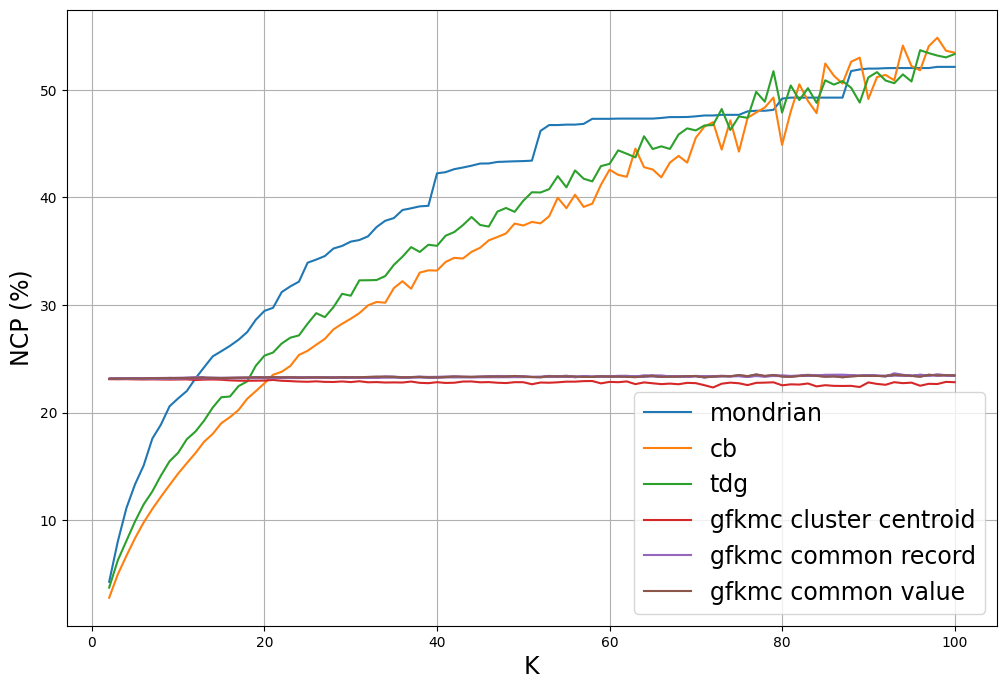

In [63]:
methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'gfkmc_most_common_register', 'gfkmc_most_common_values']
labels = ['mondrian', 'cb', 'tdg', 'gfkmc cluster centroid', 'gfkmc common record', 'gfkmc common value']

plot_ncp(methods, dataset, labels, plots_path=path, fontsize=17)

### Record Linkage

Record Linkage of Adult dataset for k=2,...,100


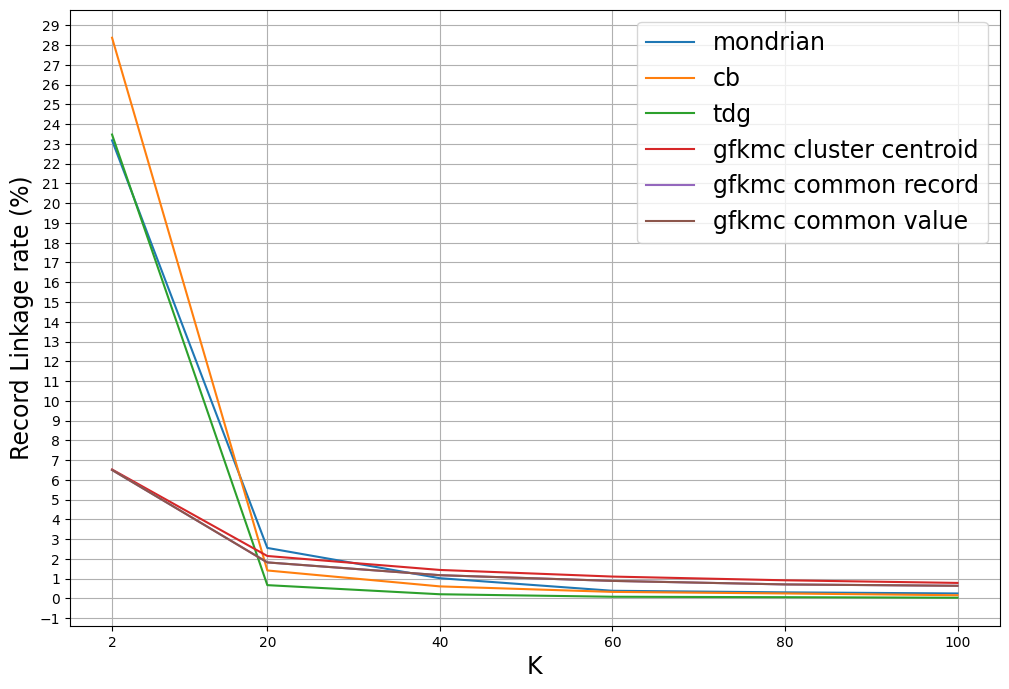

In [64]:
plot_record_linkage(methods, dataset, labels, plots_path=path, fontsize=17)

### KNN, SVM, XGD, RF

KNN model accuracy of Adult dataset for k=2,...,100


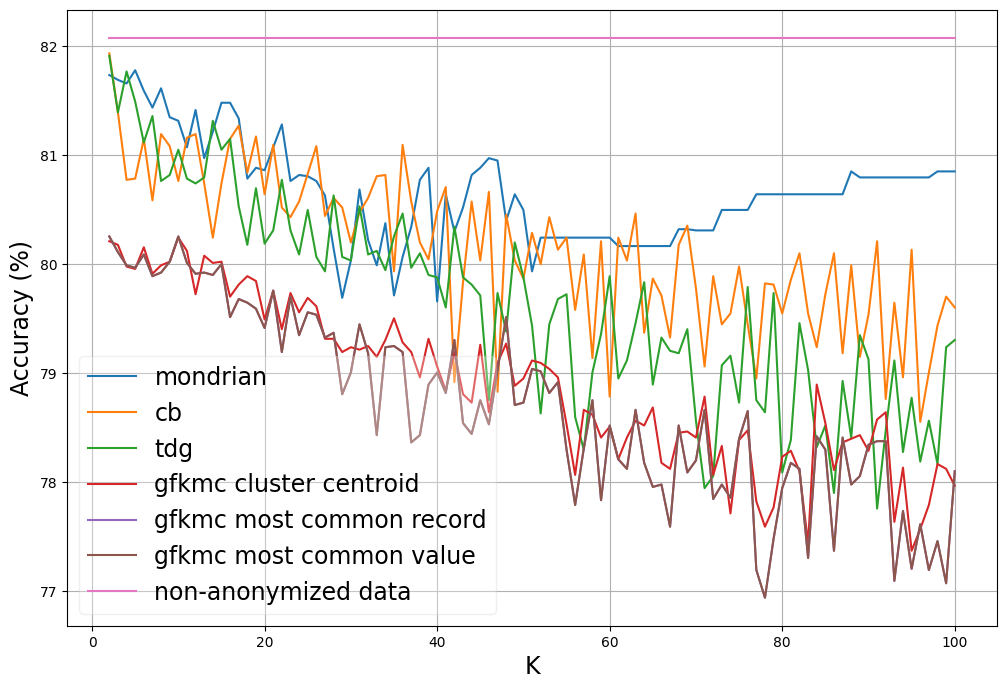

KNN model precision of Adult dataset for k=2,...,100


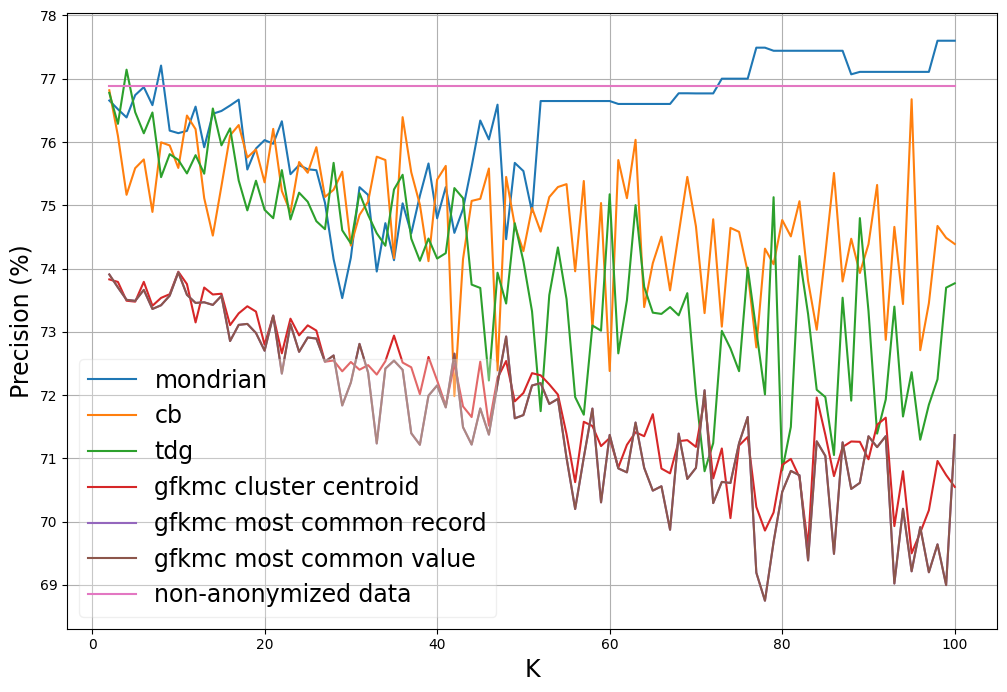

KNN model recall of Adult dataset for k=2,...,100


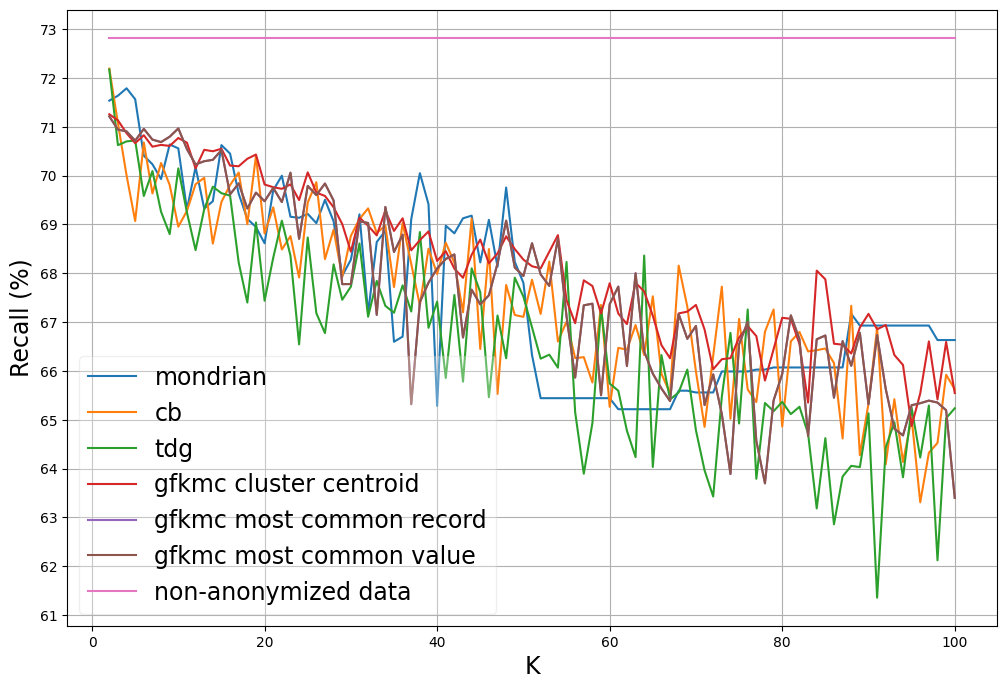

KNN model f1 of Adult dataset for k=2,...,100


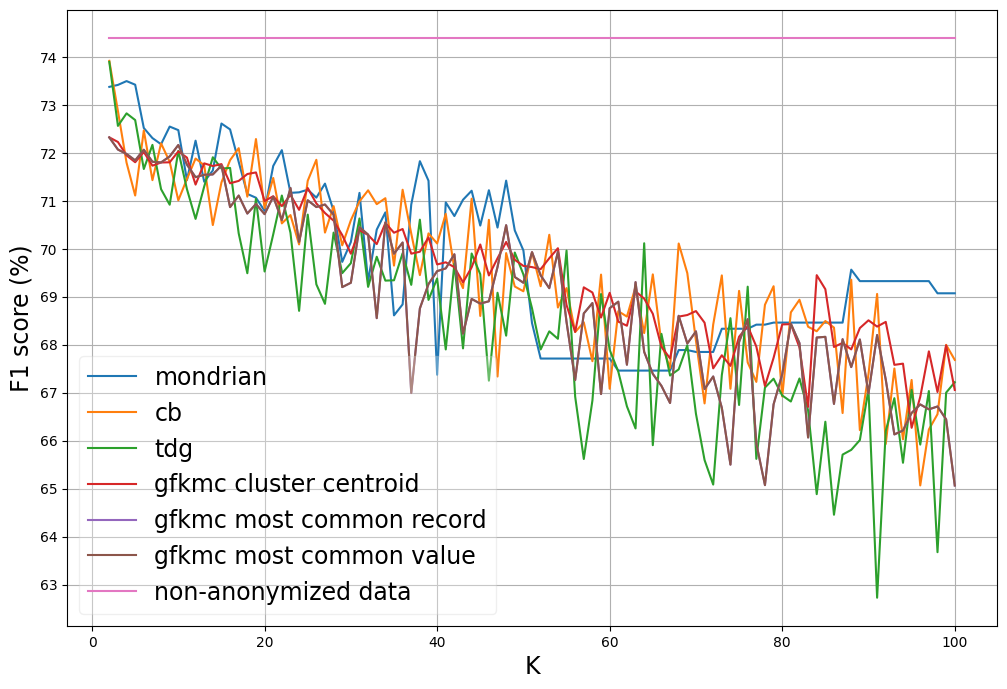

SVM model accuracy of Adult dataset for k=2,...,100


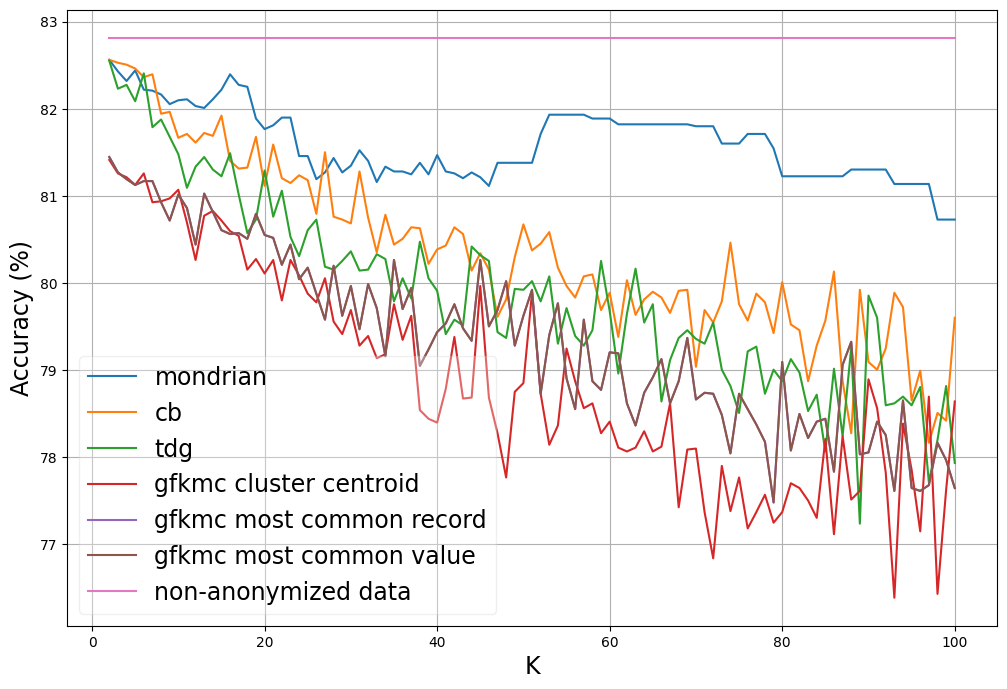

SVM model precision of Adult dataset for k=2,...,100


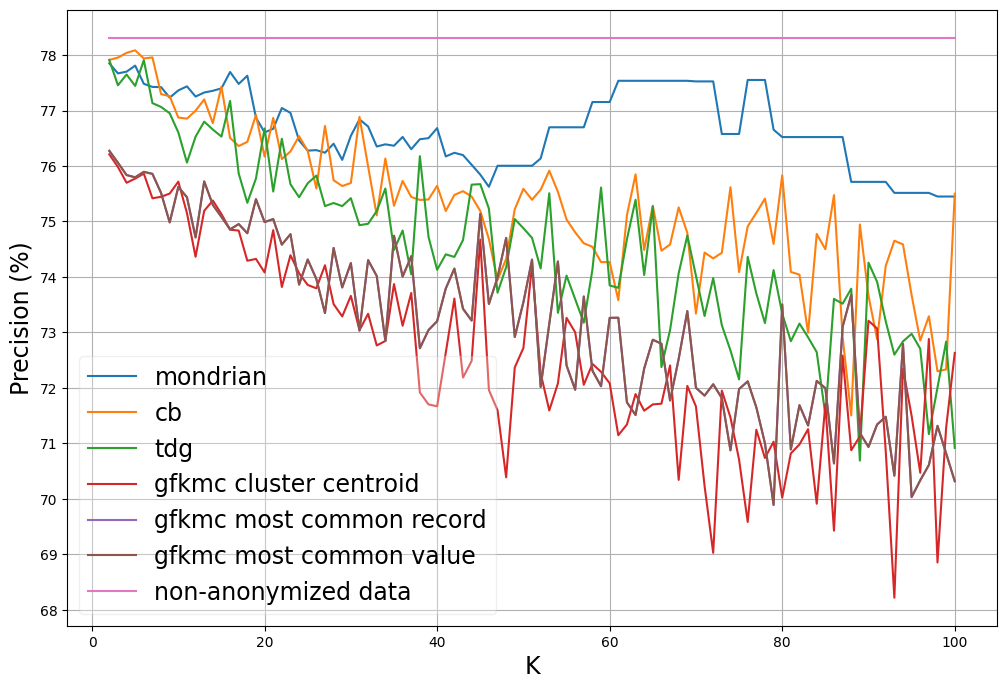

SVM model recall of Adult dataset for k=2,...,100


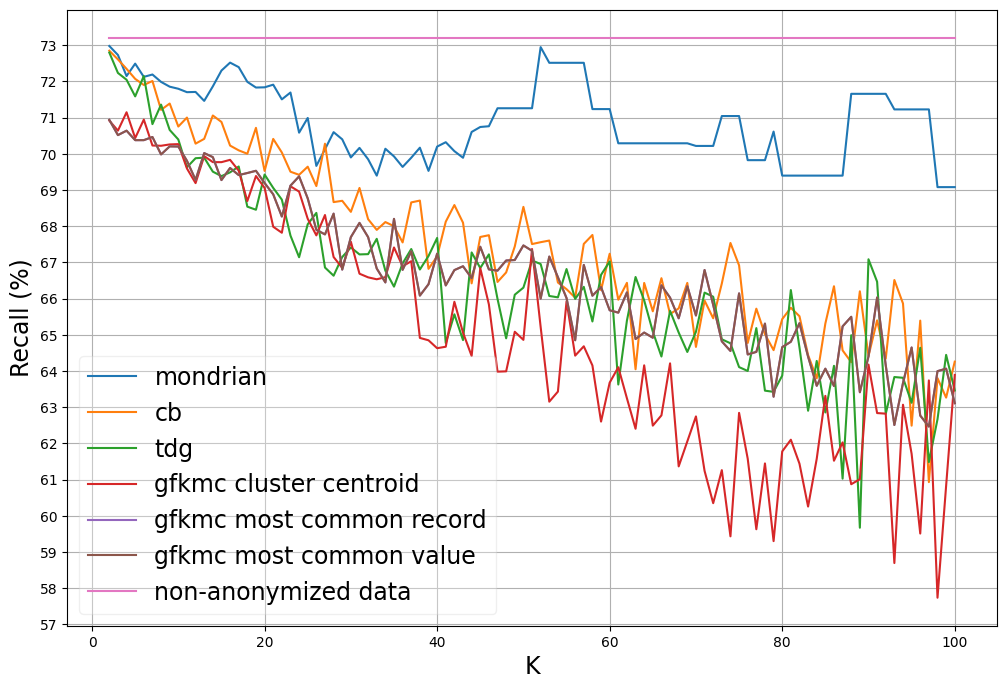

SVM model f1 of Adult dataset for k=2,...,100


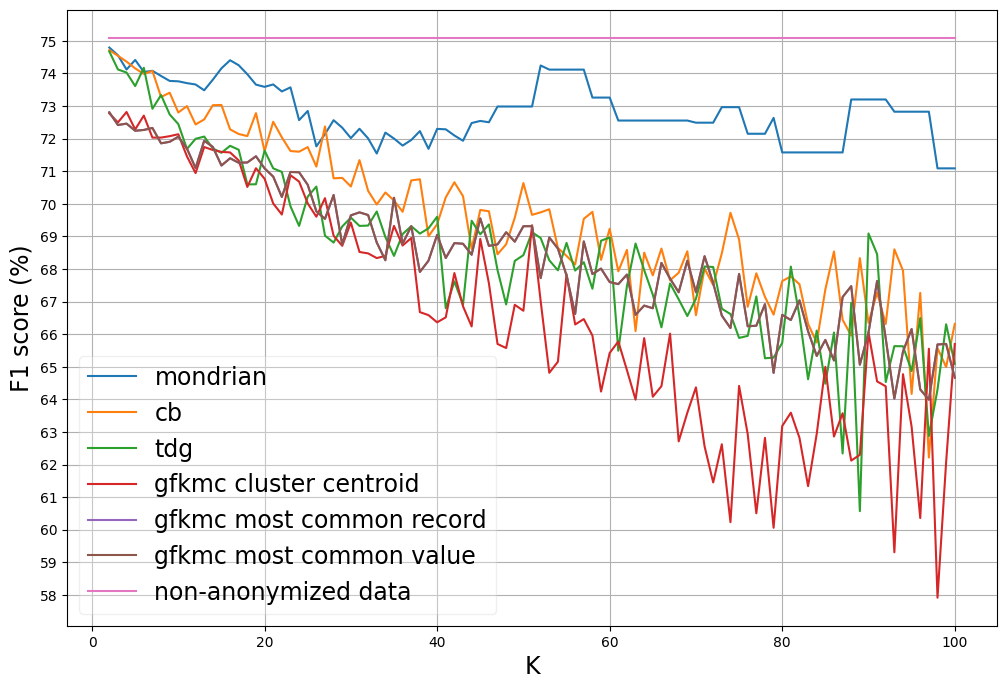

XGB model accuracy of Adult dataset for k=2,...,100


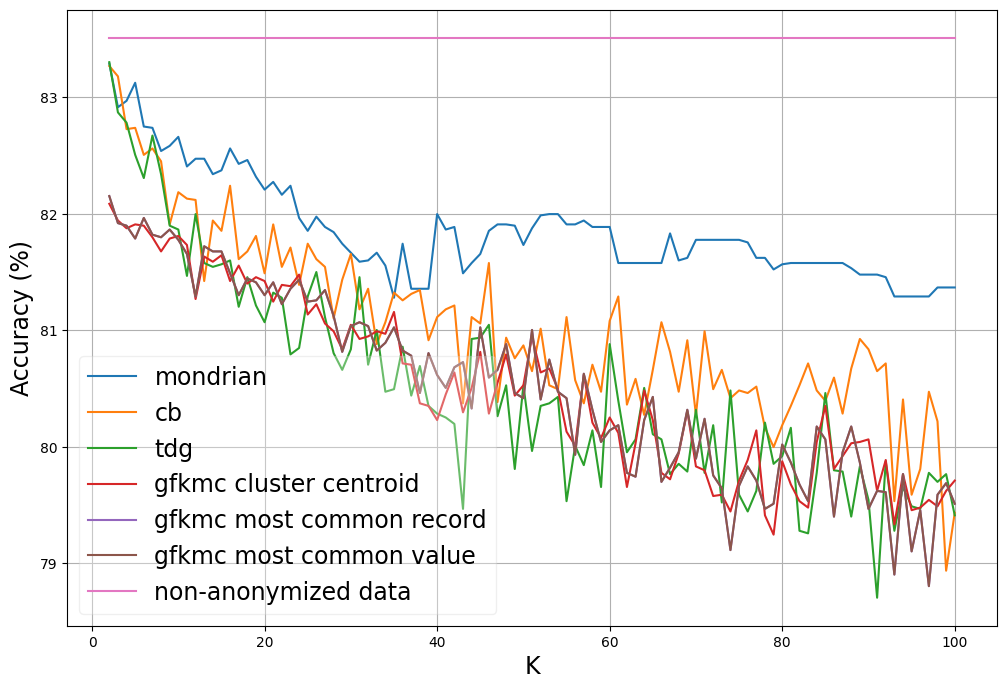

XGB model precision of Adult dataset for k=2,...,100


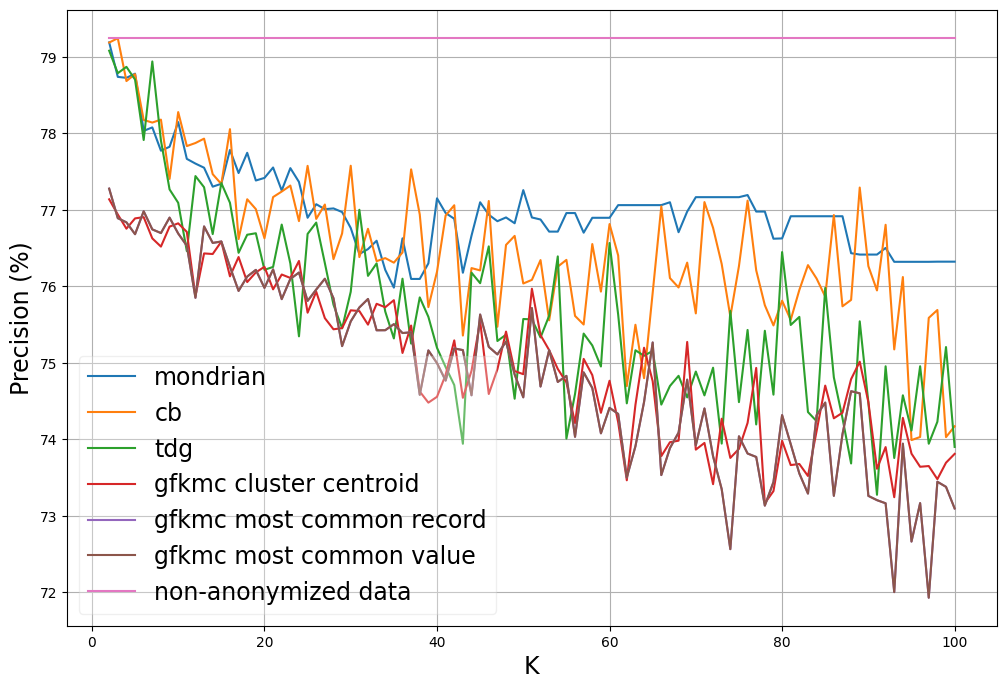

XGB model recall of Adult dataset for k=2,...,100


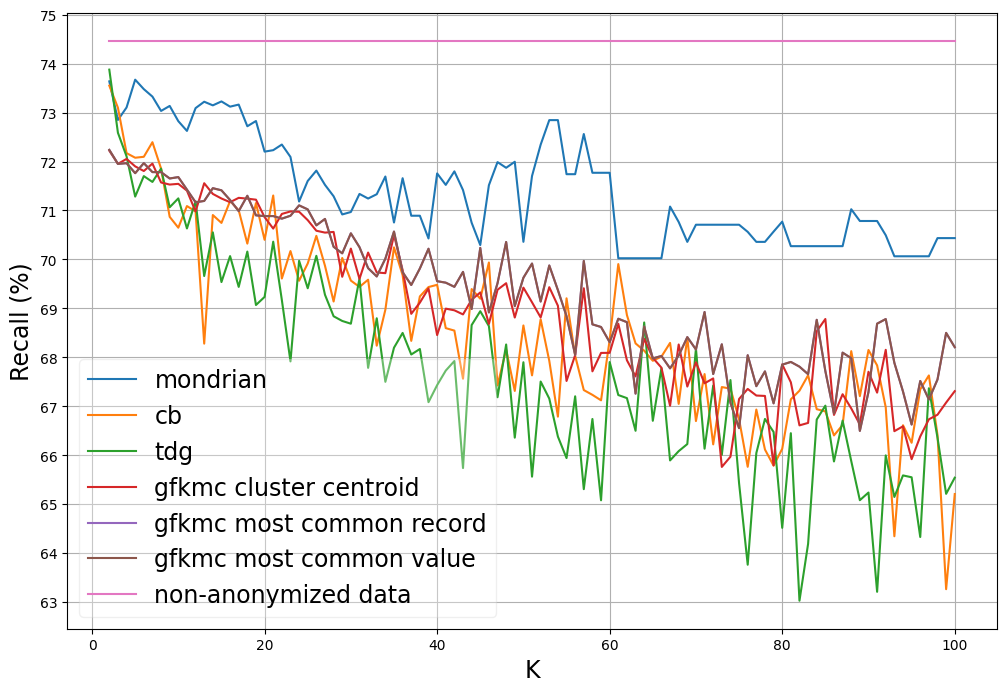

XGB model f1 of Adult dataset for k=2,...,100


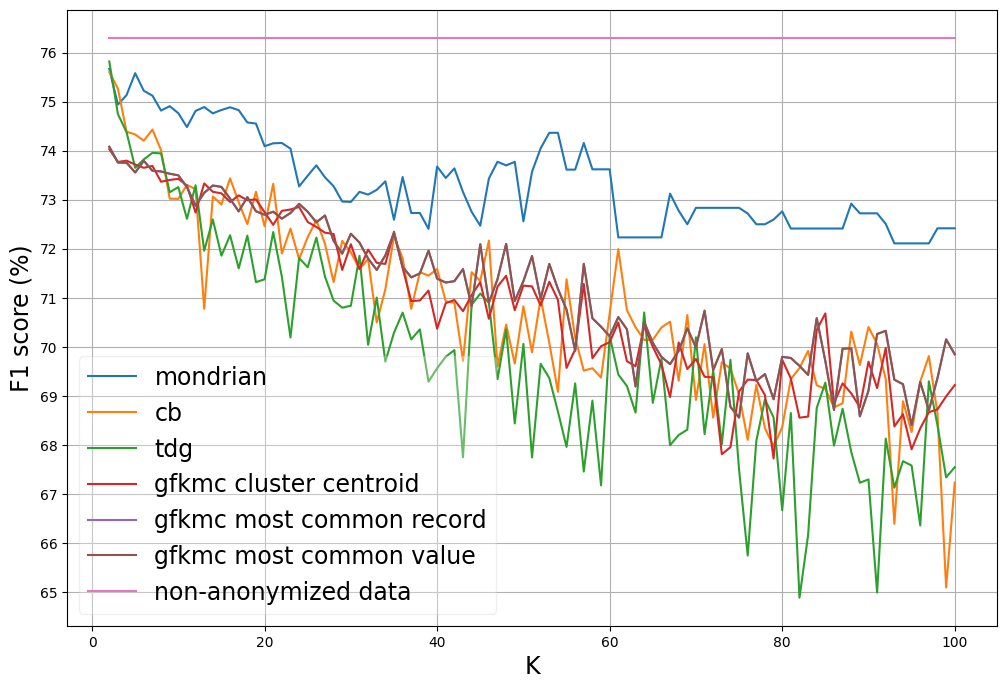

RF model accuracy of Adult dataset for k=2,...,100


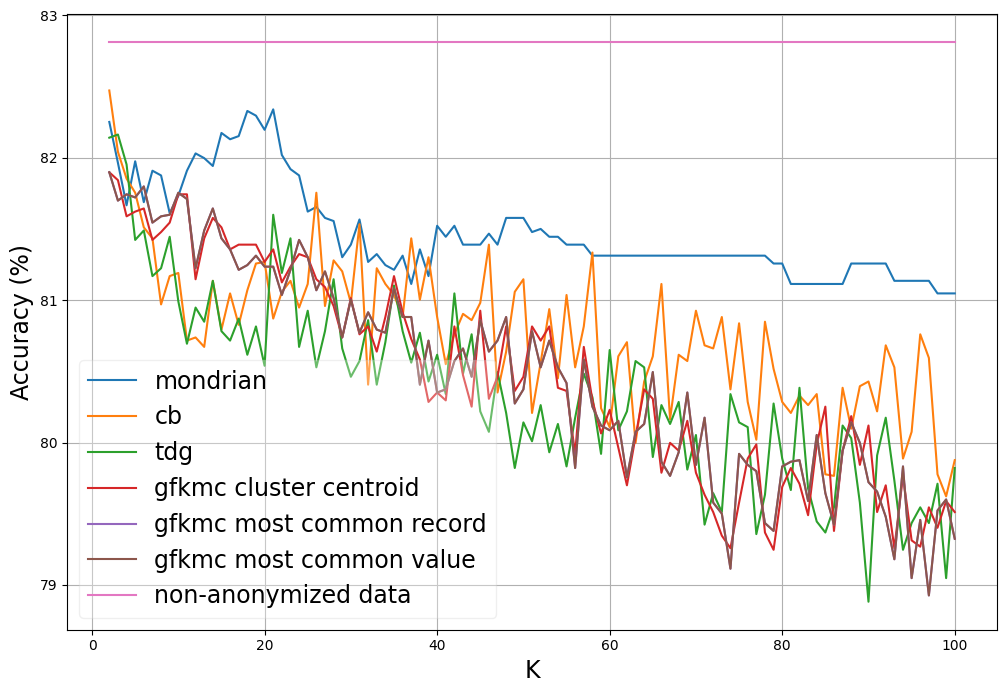

RF model precision of Adult dataset for k=2,...,100


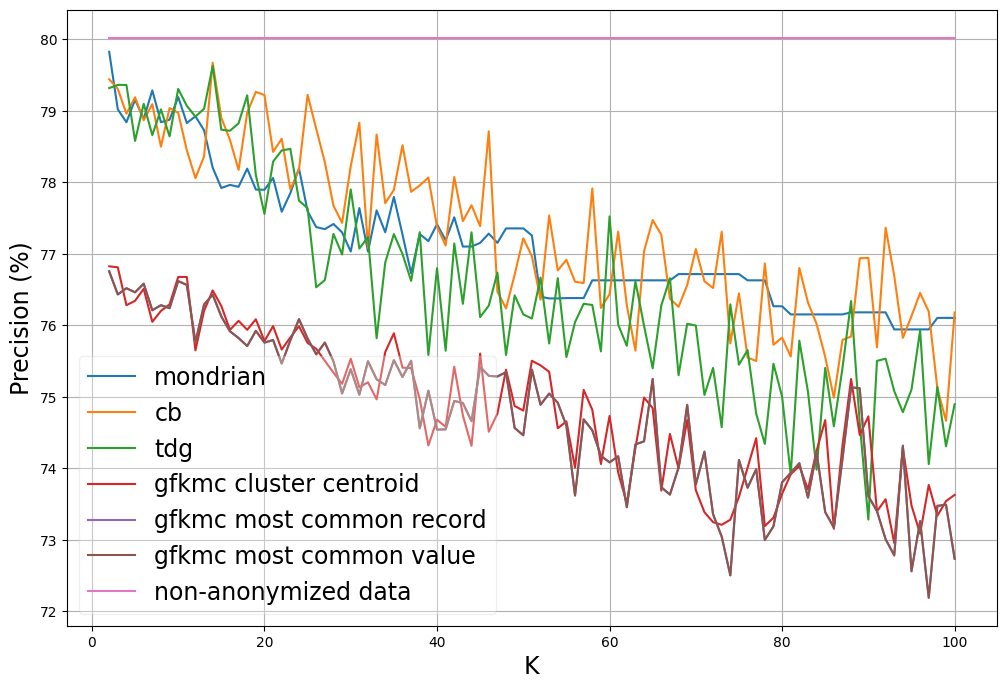

RF model recall of Adult dataset for k=2,...,100


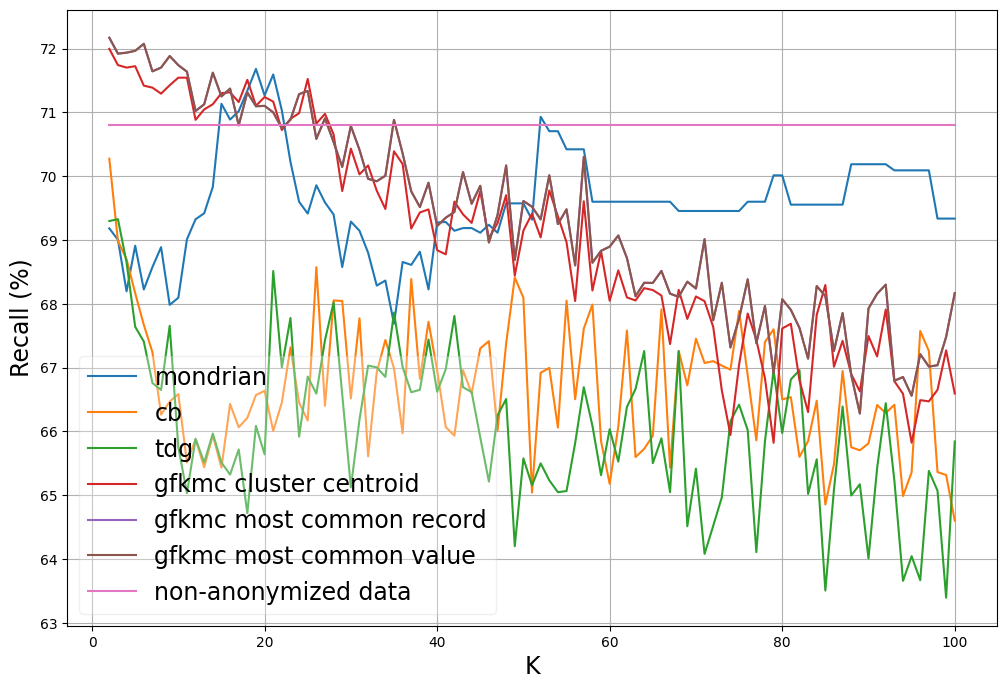

RF model f1 of Adult dataset for k=2,...,100


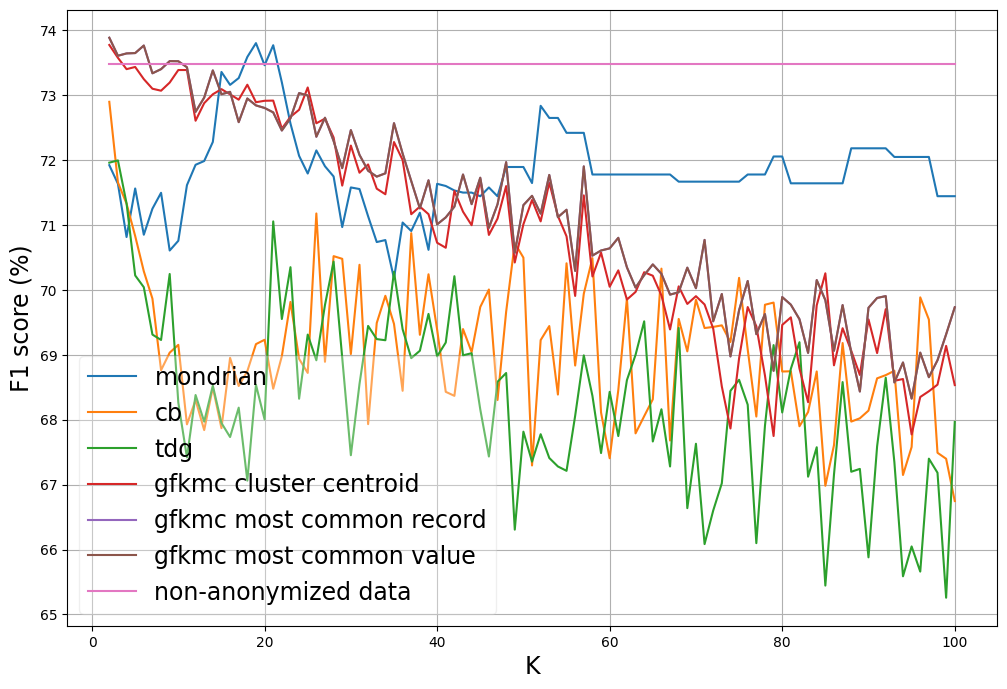

In [65]:
# methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'original']
# methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'gfkmc_most_common_register', 'original']
methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'gfkmc_most_common_register', 'gfkmc_most_common_values', 'original']
labels = ['mondrian', 'cb', 'tdg', 'gfkmc cluster centroid', 'gfkmc most common record', 'gfkmc most common value', 'non-anonymized data']
# labels = ['mondrian', 'cb', 'tdg', 'gfkmc cluster centroid', 'gfkmc most common record', 'non-anonymized data']

models = ['knn', 'svm', 'xgb', 'rf']
model_metrics = ['accuracy', 'precision', 'recall', 'f1']
model_metric_labels = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 score (%)']

for model in models:
    for model_metric, model_metric_label in zip(model_metrics, model_metric_labels):
        plot_model(methods, dataset, model, model_metric, labels, model_metric_label, plots_path=path, fontsize=17)

## Adult Categoricals only

In [66]:
dataset = 'adult_cat'
path = f'{plots_path}/{dataset}'
os.makedirs(path, exist_ok=True)

### NCP

NCP % of Adult dataset for k=2,...,100


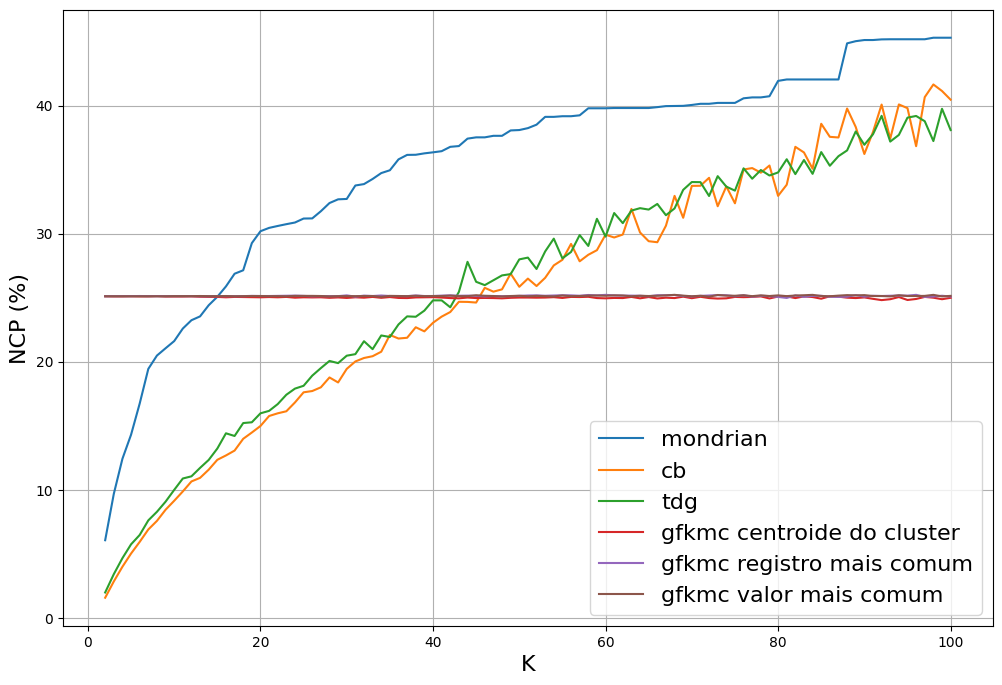

In [67]:
methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'gfkmc_most_common_register', 'gfkmc_most_common_values']
labels = ['mondrian', 'cb', 'tdg', 'gfkmc centroide do cluster', 'gfkmc registro mais comum', 'gfkmc valor mais comum']

plot_ncp(methods, dataset, labels, plots_path=path, fontsize=16)

### Record Linkage

Record Linkage of Adult dataset for k=2,...,100


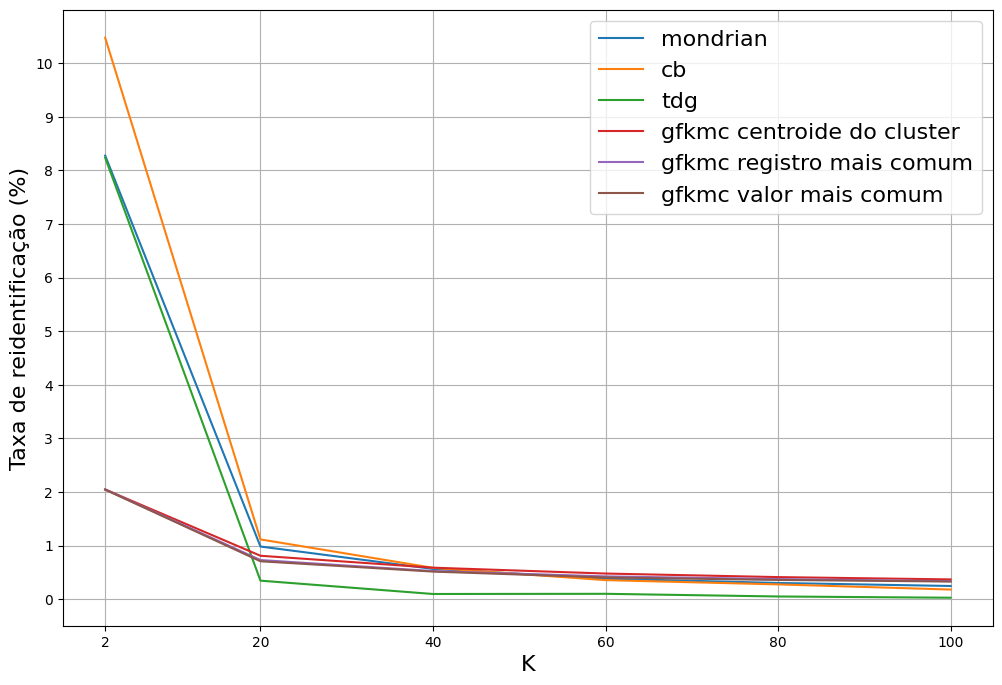

In [68]:
plot_record_linkage(methods, dataset, labels, ylabel='Taxa de reidentificação (%)', plots_path=path, fontsize=16)

### KNN, SVM, XGD, RF

KNN model accuracy of Adult dataset for k=2,...,100


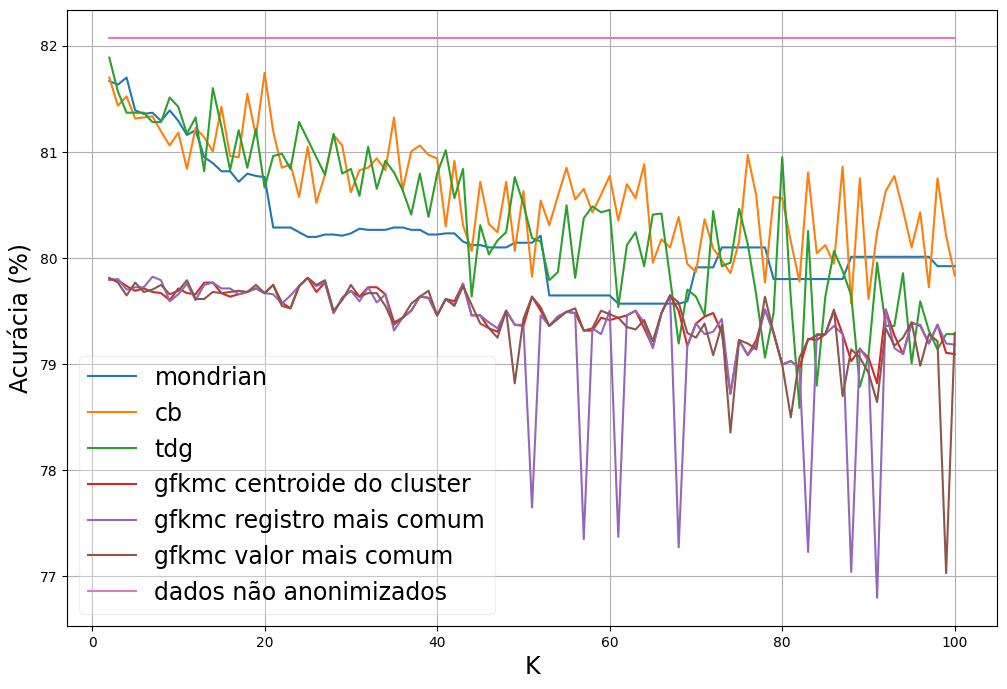

KNN model precision of Adult dataset for k=2,...,100


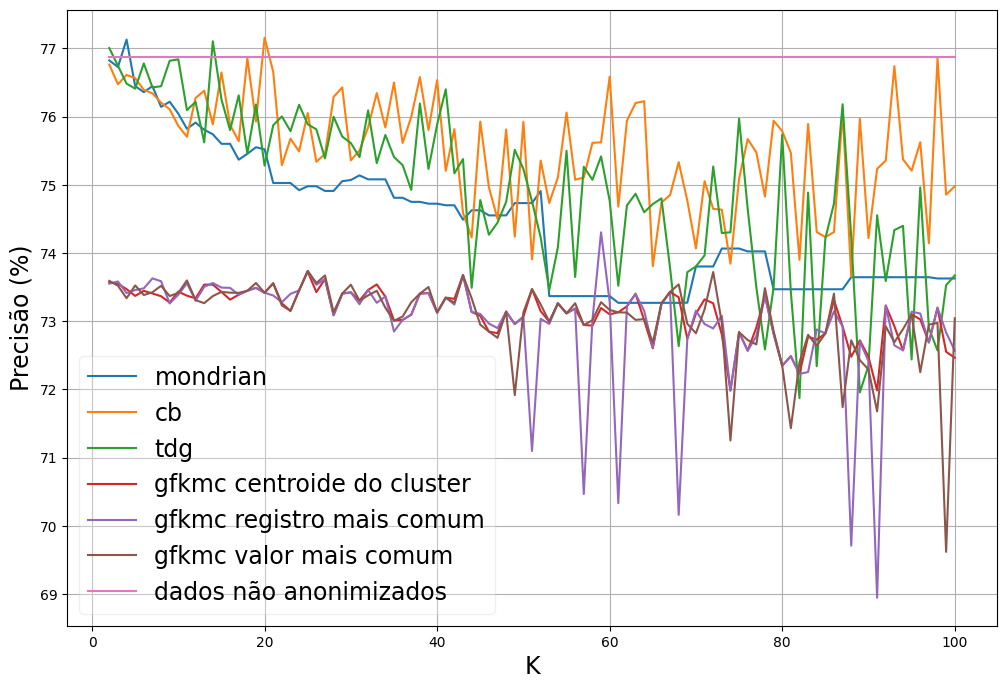

KNN model recall of Adult dataset for k=2,...,100


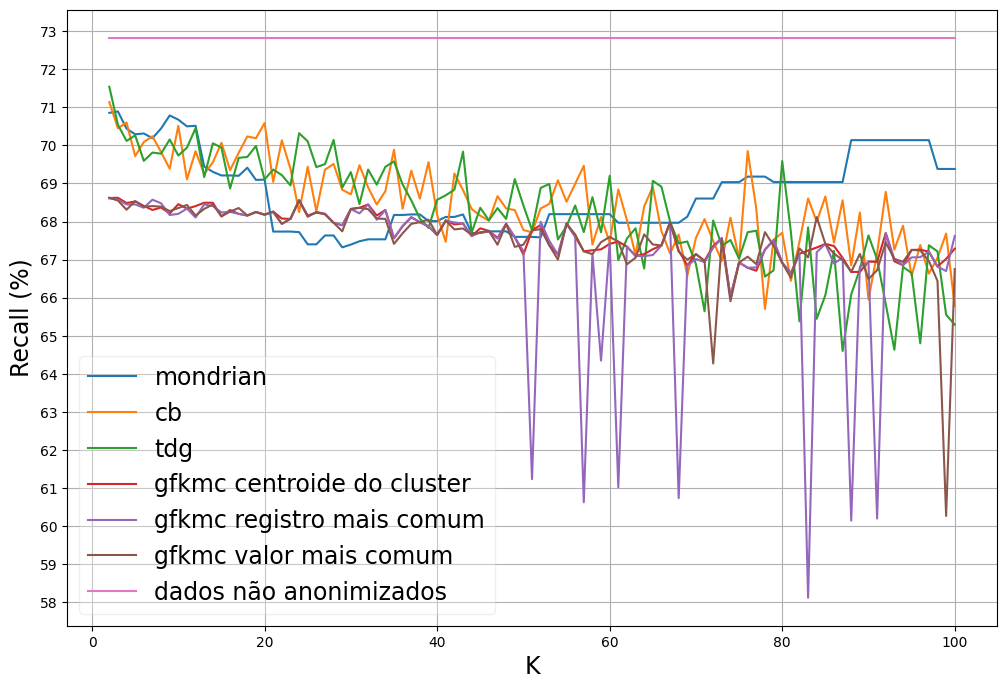

KNN model f1 of Adult dataset for k=2,...,100


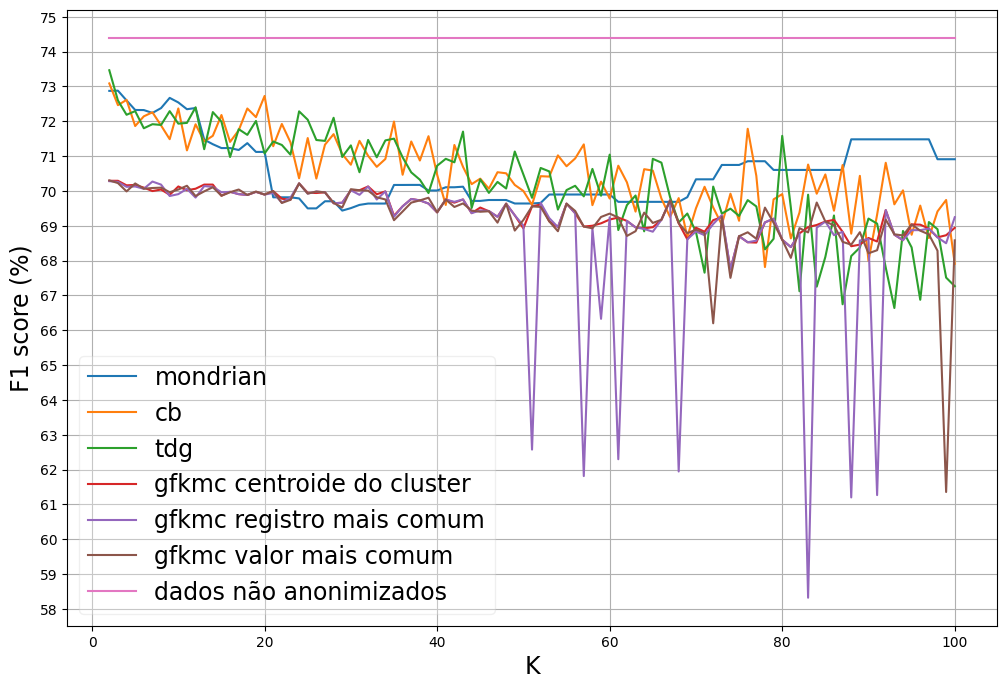

SVM model accuracy of Adult dataset for k=2,...,100


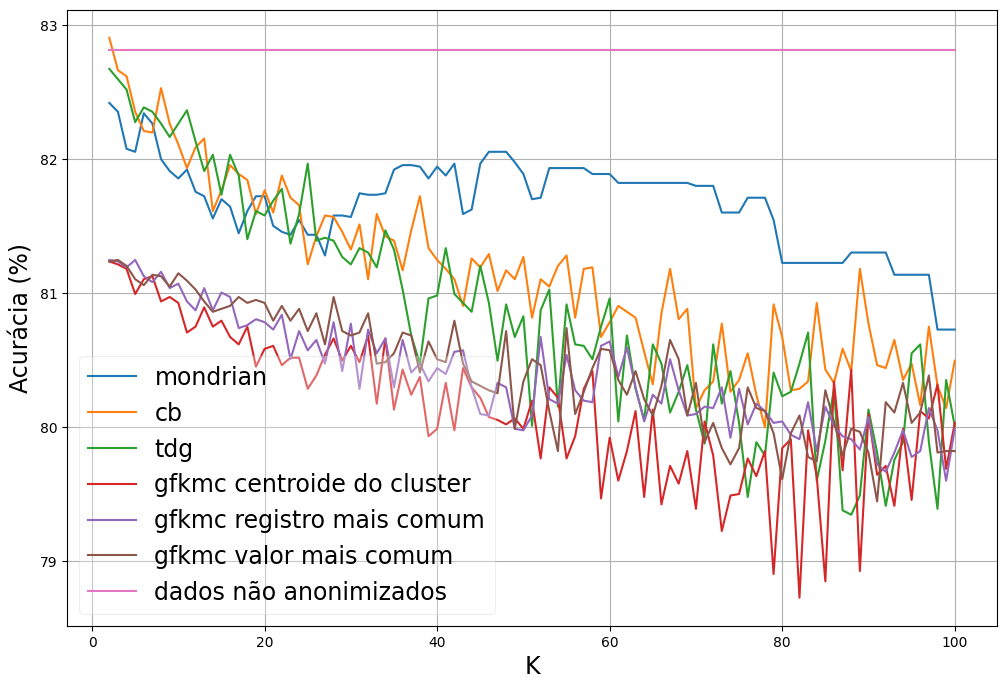

SVM model precision of Adult dataset for k=2,...,100


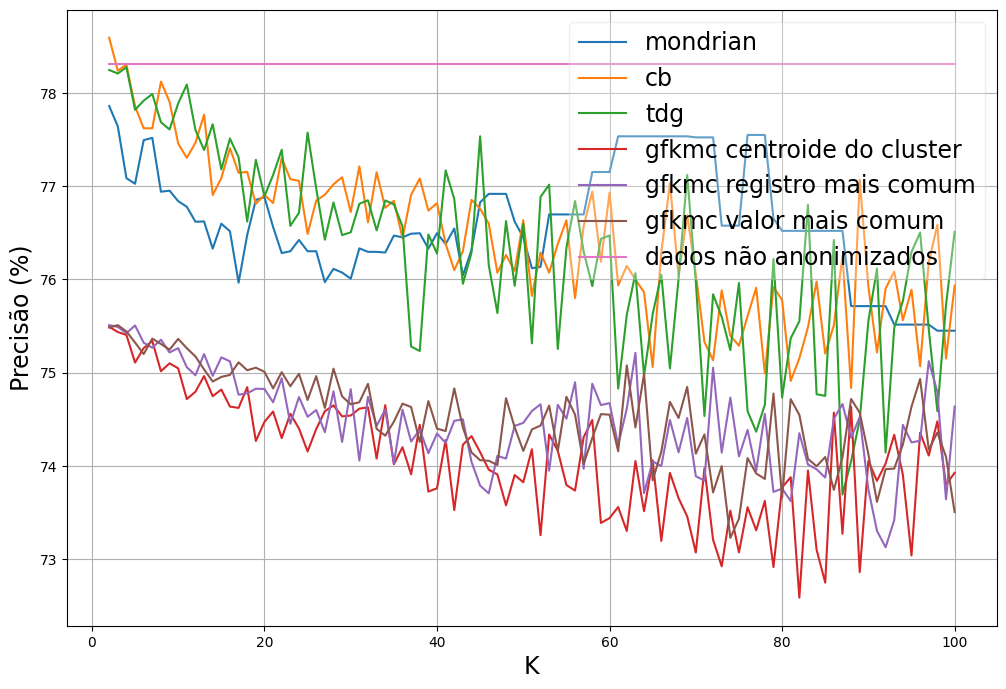

SVM model recall of Adult dataset for k=2,...,100


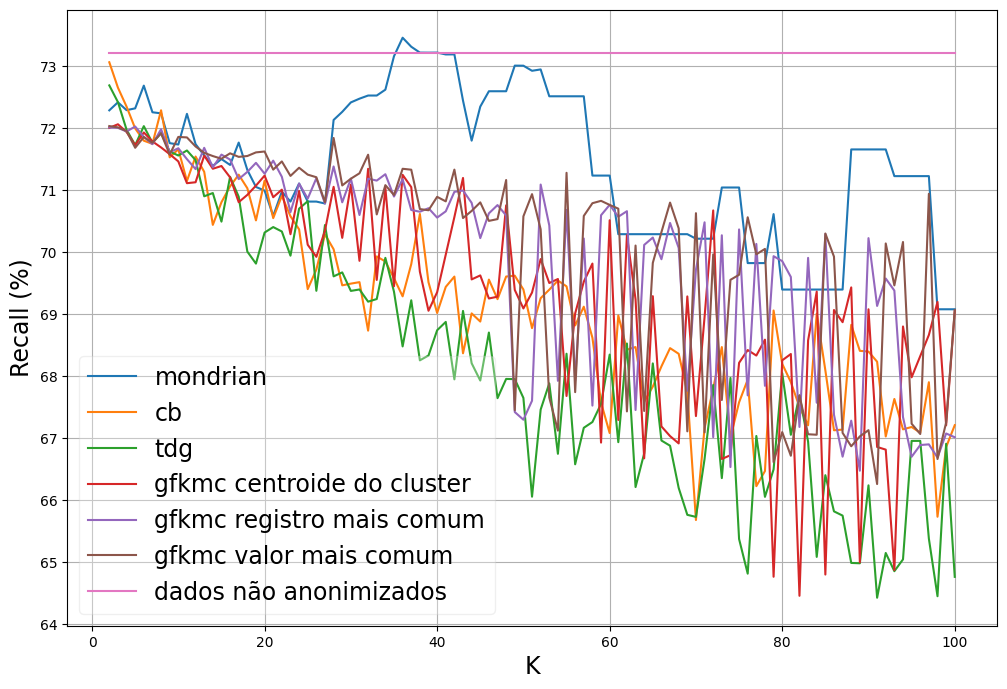

SVM model f1 of Adult dataset for k=2,...,100


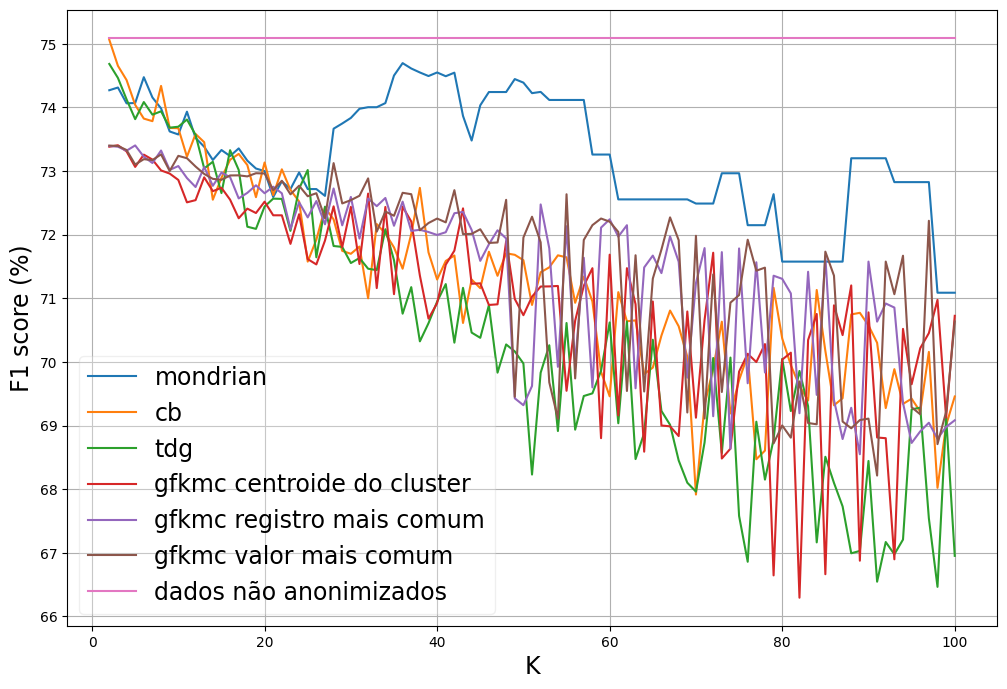

XGB model accuracy of Adult dataset for k=2,...,100


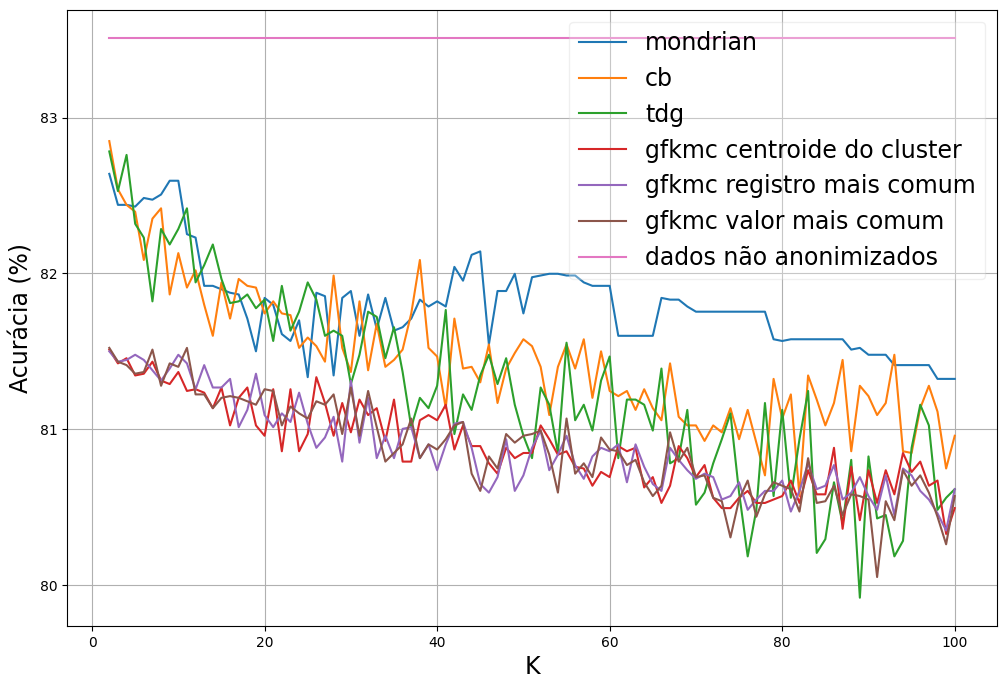

XGB model precision of Adult dataset for k=2,...,100


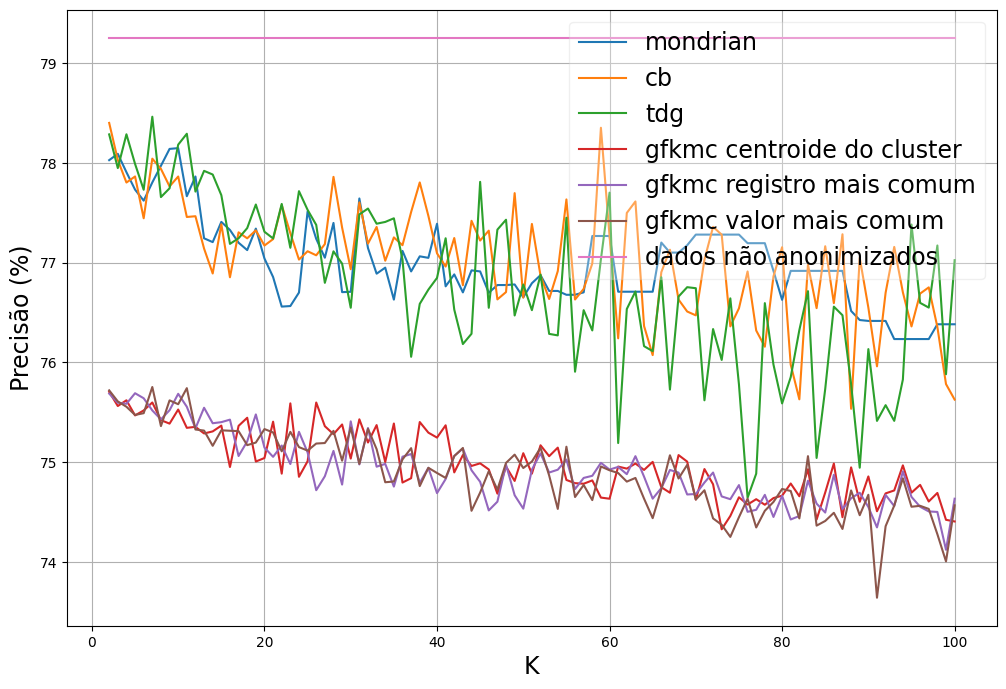

XGB model recall of Adult dataset for k=2,...,100


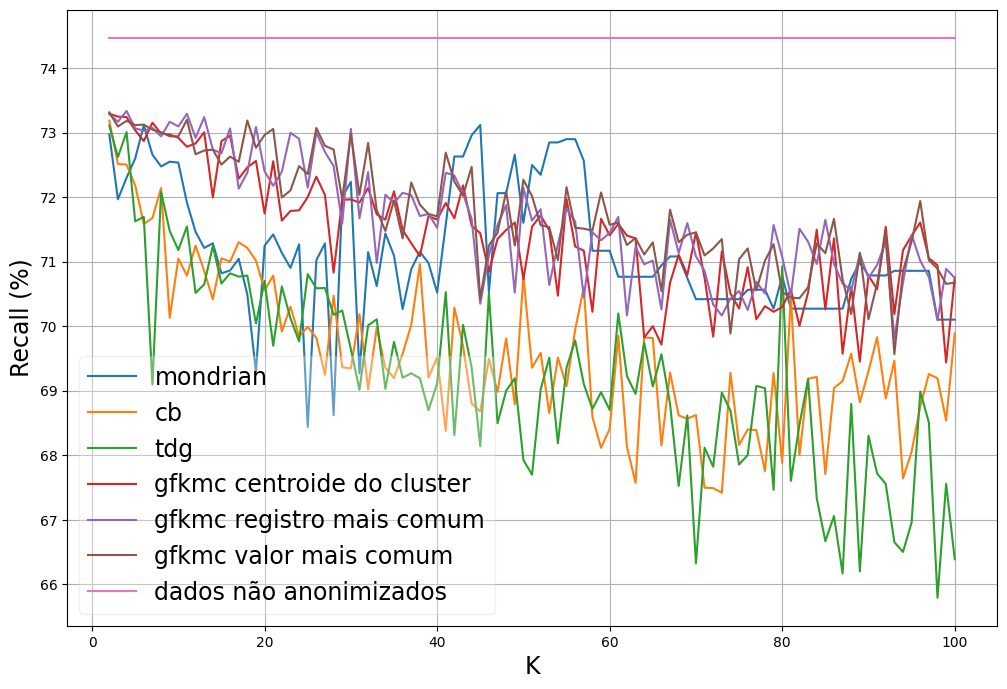

XGB model f1 of Adult dataset for k=2,...,100


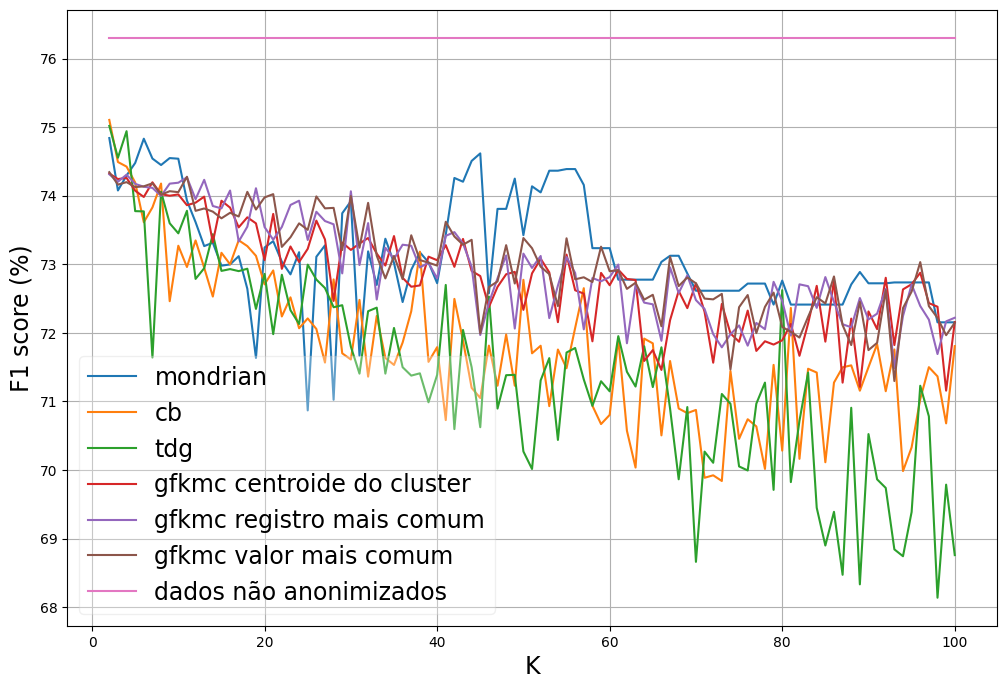

RF model accuracy of Adult dataset for k=2,...,100


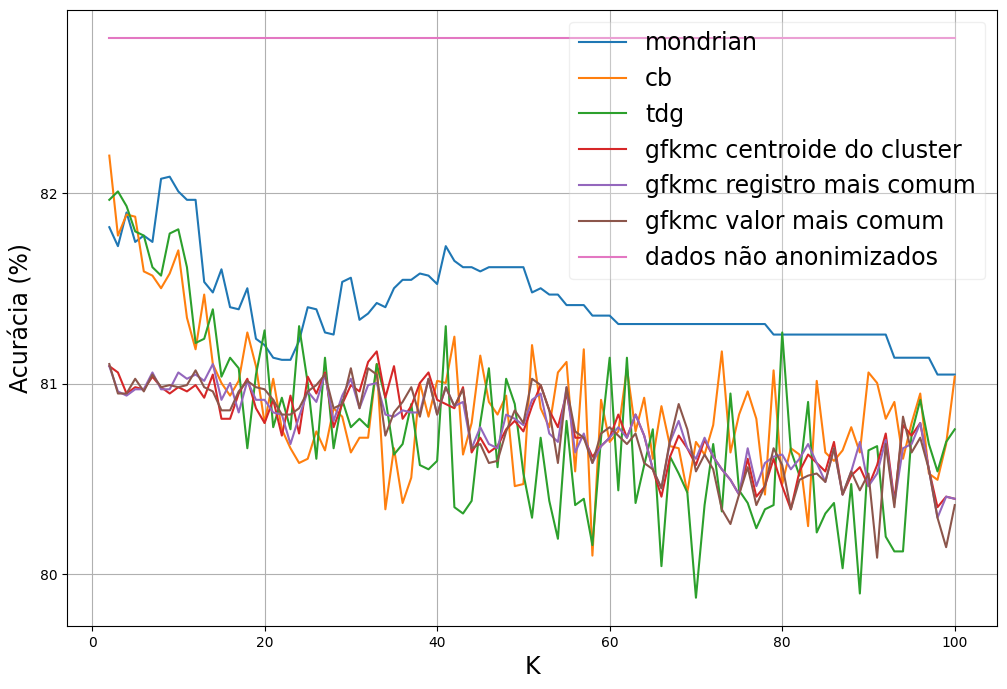

RF model precision of Adult dataset for k=2,...,100


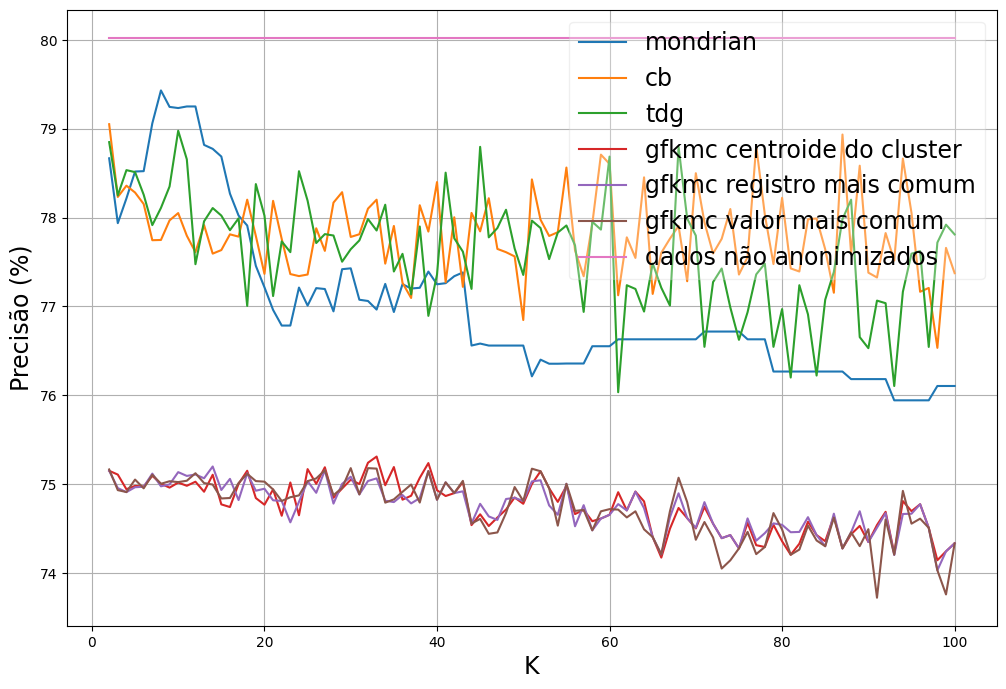

RF model recall of Adult dataset for k=2,...,100


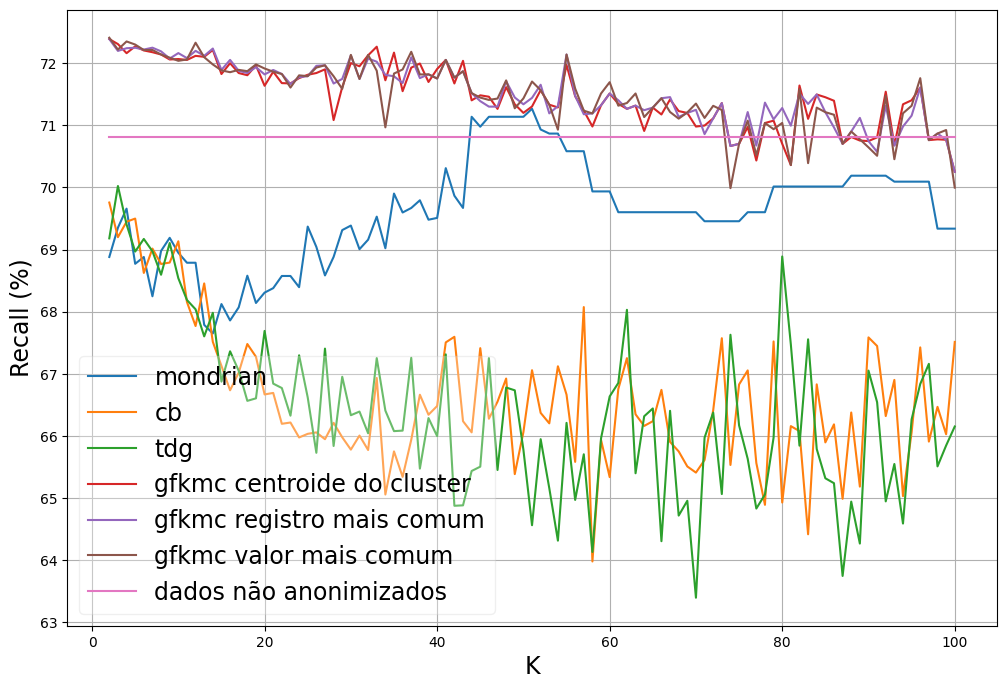

RF model f1 of Adult dataset for k=2,...,100


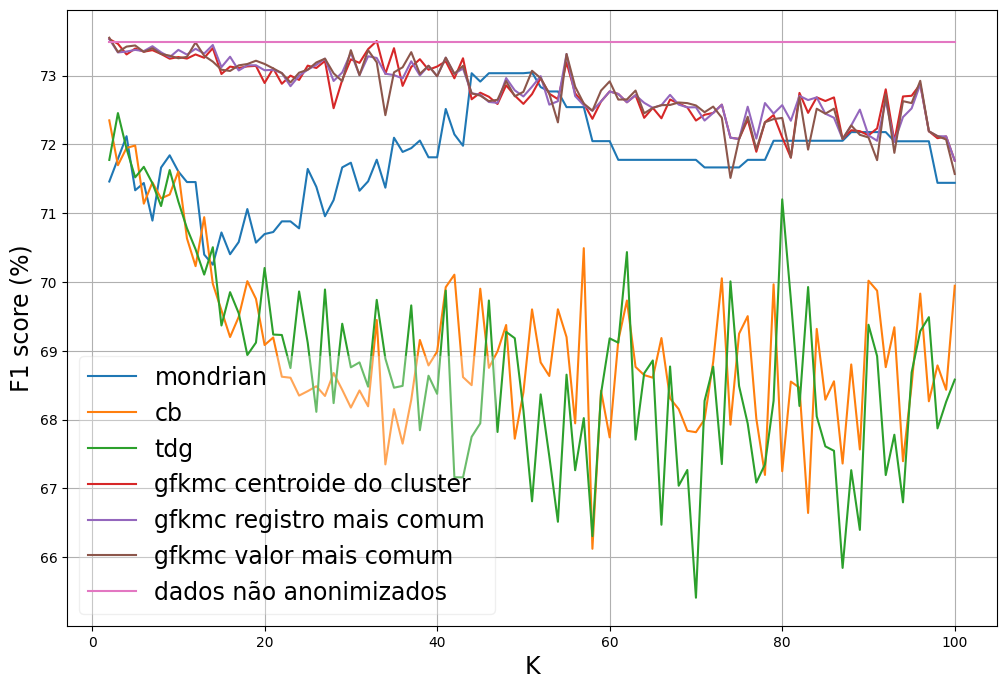

In [69]:
# methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'original']
methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'gfkmc_most_common_register', 'gfkmc_most_common_values', 'original']
# methods = ['mondrian', 'cb', 'tdg', 'gfkmc', 'gfkmc_most_common_register', 'gfkmc_most_common_values', 'original']
labels = ['mondrian', 'cb', 'tdg', 'gfkmc centroide do cluster', 'gfkmc registro mais comum', 'gfkmc valor mais comum', 'dados não anonimizados']

models = ['knn', 'svm', 'xgb', 'rf']
model_metrics = ['accuracy', 'precision', 'recall', 'f1']
model_metric_labels = ['Acurácia (%)', 'Precisão (%)', 'Recall (%)', 'F1 score (%)']

for model in models:
    for model_metric, model_metric_label in zip(model_metrics, model_metric_labels):
        plot_model(methods, dataset, model, model_metric, labels, model_metric_label, plots_path=path, fontsize=17)